In [261]:
import pandas as pd
import numpy as np

In [263]:
df = pd.read_csv('cars_list.csv')

In [265]:
# Initial look of the dataframe.
df.head()

,addref,city,assembly,body,make,model,year,engine,transmission,fuel,color,registered,mileage,price
0,7943732,Peshawar,NaN,Sedan,Toyota,Corolla,2013.0,1300.0,Manual,Petrol,Silver Metallic,Lahore,145000,2870000.0
1,7730314,Lahore,NaN,Sedan,Honda,City,2000.0,1300.0,Manual,Petrol,Blue,Lahore,230000,995000.0
2,7943737,Lahore,NaN,Sedan,Toyota,Yaris,2021.0,1300.0,Manual,Petrol,Super White,Punjab,60500,3585000.0
3,7943733,Lahore,NaN,Hatchback,Suzuki,Swift,2017.0,1300.0,Manual,Petrol,Grey,Islamabad,87000,2250000.0
4,7923484,Lahore,NaN,Sedan,Honda,Civic,2017.0,1800.0,Automatic,Petrol,Grey,Lahore,86000,4850000.0


In [267]:
# Initial shape of the dataframe.
df.shape 

(77878, 14)

In [269]:
# Removing un-necessary columns from the dataframe.
df = df.drop(columns=['addref', 'city', 'color', 'registered'])

In [271]:
# what data type does the columns containg?
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77878 entries, 0 to 77877
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   assembly      24189 non-null  object 
 1   body          68974 non-null  object 
 2   make          77878 non-null  object 
 3   model         77878 non-null  object 
 4   year          73099 non-null  float64
 5   engine        77875 non-null  float64
 6   transmission  77878 non-null  object 
 7   fuel          76972 non-null  object 
 8   mileage       77878 non-null  int64  
 9   price         77295 non-null  float64
dtypes: float64(3), int64(1), object(6)
memory usage: 5.9+ MB


In [273]:
# how does the data look like after removing un-necessary columns?
df.head() 

,assembly,body,make,model,year,engine,transmission,fuel,mileage,price
0,NaN,Sedan,Toyota,Corolla,2013.0,1300.0,Manual,Petrol,145000,2870000.0
1,NaN,Sedan,Honda,City,2000.0,1300.0,Manual,Petrol,230000,995000.0
2,NaN,Sedan,Toyota,Yaris,2021.0,1300.0,Manual,Petrol,60500,3585000.0
3,NaN,Hatchback,Suzuki,Swift,2017.0,1300.0,Manual,Petrol,87000,2250000.0
4,NaN,Sedan,Honda,Civic,2017.0,1800.0,Automatic,Petrol,86000,4850000.0


In [275]:
# Now the data has 77,878 rows and 10 columns
df.shape 

(77878, 10)

In [277]:
# Checking for any missing values
df.isnull()

,assembly,body,make,model,year,engine,transmission,fuel,mileage,price
0,True,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
77873,True,False,False,False,False,False,False,False,False,False
77874,False,False,False,False,False,False,False,False,False,False
77875,False,False,False,False,False,False,False,False,False,False
77876,True,False,False,False,False,False,False,False,False,False


In [279]:
# How does the data look mathematically?
df.describe()

,year,engine,mileage,price
count,73099.000000,77875.000000,77878.000000,7.729500e+04
mean,2012.812610,1408.072550,91109.192750,3.883232e+06
std,7.516685,704.459947,89275.336173,5.759480e+06
min,1990.000000,3.000000,1.000000,1.100000e+05
25%,2007.000000,1000.000000,34000.000000,1.450000e+06
50%,2015.000000,1300.000000,80000.000000,2.700000e+06
75%,2019.000000,1600.000000,123456.000000,4.500000e+06
max,2022.000000,15000.000000,1000000.000000,5.290000e+08


In [281]:
# Upon looking at the model column there were some numbers and incomplete names of the cars
df['model'].unique()

array(['Corolla', 'City', 'Yaris', 'Swift', 'Civic', 'Move', 'Mehran',
       'Mira', 'Pajero', 'Cultus', 'Vitz', 'Alto', 'Land', 'BR-V',
       'Tucson', 'Passo', 'C-HR', 'Hustler', 'Sportage', 'Liana', 'Aqua',
       'Baleno', 'Dayz', 'Belta', 'Vezel', 'Every', 'Raize', 'Hijet',
       'Prado', 'Elantra', 'Hilux', 'Fortuner', 'Revo', 'Carol', 'Sunny',
       'N', 'RX', 'Wagon', 'Benz', 'Bolan', 'Picanto', '6', 'Roomy',
       'Prius', 'Hiace', 'Cuore', '3', 'Karvaan', 'Charade', 'Alsvin',
       'Glory', 'Accord', 'Freed', 'X-PV', 'Otti', 'Duet', 'Corona',
       'X70', 'FX', 'H6', 'Saga', 'Grand', 'HS', 'Up', 'Sonata', 'Oshan',
       'Clipper', 'Premio', 'Rover', 'Tundra', 'Sorento', 'Atrai',
       'Santro', 'Flair', 'RX8', 'A3', 'Esse', 'Vitara', '2008', 'ZS',
       '5', 'Aygo', 'Bravo', 'Pleo', 'Fit', 'Life', 'Cross', 'Khyber',
       'Terios', 'Roox', 'Tanto', 'Santa', 'Stonic', 'HR-V', 'Sienta',
       'AD', 'A5', 'X5', 'Mark', 'Lancer', 'Wrangler', 'Ek', 'Model',
       'Cel

In [283]:
df['car_name'] = df['make'] + ' ' + df['model']

In [285]:
df

,assembly,body,make,model,year,engine,transmission,fuel,mileage,price,car_name
0,NaN,Sedan,Toyota,Corolla,2013.0,1300.0,Manual,Petrol,145000,2870000.0,Toyota Corolla
1,NaN,Sedan,Honda,City,2000.0,1300.0,Manual,Petrol,230000,995000.0,Honda City
2,NaN,Sedan,Toyota,Yaris,2021.0,1300.0,Manual,Petrol,60500,3585000.0,Toyota Yaris
3,NaN,Hatchback,Suzuki,Swift,2017.0,1300.0,Manual,Petrol,87000,2250000.0,Suzuki Swift
4,NaN,Sedan,Honda,Civic,2017.0,1800.0,Automatic,Petrol,86000,4850000.0,Honda Civic
...,...,...,...,...,...,...,...,...,...,...,...
77873,NaN,Sedan,Honda,Civic,2019.0,1800.0,Automatic,Petrol,58000,5590000.0,Honda Civic
77874,Imported,Hatchback,Suzuki,Alto,2015.0,660.0,Automatic,Petrol,65000,2420000.0,Suzuki Alto
77875,Imported,Crossover,MG,HS,2021.0,1490.0,Automatic,Petrol,5000,7500000.0,MG HS
77876,NaN,Sedan,Suzuki,Baleno,2005.0,1300.0,Manual,Petrol,19000,1250000.0,Suzuki Baleno


In [287]:
df = df.drop(columns=['make', 'model'])

In [289]:
df.head()

,assembly,body,year,engine,transmission,fuel,mileage,price,car_name
0,NaN,Sedan,2013.0,1300.0,Manual,Petrol,145000,2870000.0,Toyota Corolla
1,NaN,Sedan,2000.0,1300.0,Manual,Petrol,230000,995000.0,Honda City
2,NaN,Sedan,2021.0,1300.0,Manual,Petrol,60500,3585000.0,Toyota Yaris
3,NaN,Hatchback,2017.0,1300.0,Manual,Petrol,87000,2250000.0,Suzuki Swift
4,NaN,Sedan,2017.0,1800.0,Automatic,Petrol,86000,4850000.0,Honda Civic


## Imputation for missing values

In [292]:
# There are missing values in each column except transmission, mileage and car_name columns
df.isna().sum()

assembly        53689
body             8904
year             4779
engine              3
transmission        0
fuel              906
mileage             0
price             583
car_name            0
dtype: int64

In [294]:
# Since assembly column has 70 percent missing values so we will drop this column from the dataframe and the engine column also
df = df.drop(columns=['assembly', 'engine'])

In [296]:
# In the body column, there are 21 categories since it is a categorical column and there is a nan_category representing missing values
df['body'].unique()

array(['Sedan', 'Hatchback', 'SUV', 'MPV', nan, 'Crossover', 'Micro Van',
       'Mini Van', 'Double Cabin', 'Compact sedan', 'High Roof', 'Van',
       'Compact SUV', 'Pick Up', 'Coupe', 'Station Wagon', 'Convertible',
       'Truck', 'Off-Road Vehicles', 'Mini Vehicles', 'Single Cabin',
       'Compact hatchback'], dtype=object)

In [298]:
# Filtering for those cars which are sedan but the body_column has missing values and imputing them with their respective category
df.loc[df['car_name'].isin(['Toyota Yaris', 'Toyota Corolla', 'Honda City', 'Honda Civic', 'Suzuki Liana', 'Suzuki Baleno', 'Toyota Belta', 'Hyundai Elantra', 'Toyota Prius', 'Mercedes Benz', 'Changan Alsvin', 'Honda Accord', 'Toyota Corona', 'Proton Saga', 'Hyundai Sonata', 'Toyota Premio', 'Nissan Sunny', 'Toyota Mark', 'Toyota Avensis', 'Toyota Crown', 'Toyota Camry', 'Mitsubishi Lancer', 'Toyota Allion', 'Honda Grace', 'Suzuki Ciaz', 'Suzuki Margalla', 'Tesla Model', 'Chevrolet Optra', 'Toyota Platz', 'Daewoo Racer', 'Suzuki Kizashi', 'Hyundai Excel', 'Honda Insight', 'BMW i4', 'Mitsubishi Galant', 'Porsche Panamera', 'Toyota Cressida', 'Honda Inspire', 'Audi e-tron', 'KIA Spectra', 'Nissan Bluebird', 'Proton Gen', 'Toyota Altezza', 'Porsche Taycan', 'Subaru Impreza', 'Daewoo Cielo', 'Buick Roadmaster', 'Toyota Chaser', 'Bentley Mulsanne', 'Honda Fit', 'Nissan Skyline']) & (df['body'].isna()), 'body'] = 'Sedan'

In [300]:
# Filtering for those cars which are hatchback but the body_column has missing values or blanks and imputing their respective category
df.loc[df['car_name'].isin(['Suzuki Swift', 'Daihatsu Move', 'Suzuki Cultus', 'Toyota Vitz', 'Suzuki Alto', 'Toyota Passo', 'Suzuki Hustler', 'Suzuki Mehran', 'Toyota Aqua', 'Daihatsu Mira', 'Mazda Carol', 'Honda N', 'Suzuki Wagon', 'KIA Picanto', 'Daihatsu Cuore', 'Nissan Dayz', 'Daihatsu Esse', 'Hyundai Santro', 'Honda Fit', 'Honda Life', 'Suzuki Khyber', 'Mazda Carol', 'Daihatsu Charade', 'Suzuki FX', 'United Bravo', 'Daihatsu Tanto', 'Nissan Otti', 'Mitsubishi Ek', 'Nissan Note', 'Honda Zest', 'Prince Pearl', 'Daihatsu Cast', 'Nissan Moco']) & (df['body'].isna()), 'body'] = 'Hatchback'

In [302]:
df['body'].isna().sum()

3670

In [304]:
df = df.dropna(subset=['body'])

In [306]:
df['car_name'].unique()

array(['Toyota Corolla', 'Honda City', 'Toyota Yaris', 'Suzuki Swift',
       'Honda Civic', 'Daihatsu Move', 'Suzuki Mehran', 'Daihatsu Mira',
       'Mitsubishi Pajero', 'Suzuki Cultus', 'Toyota Vitz', 'Suzuki Alto',
       'Toyota Land', 'Honda BR-V', 'Hyundai Tucson', 'Toyota Passo',
       'Toyota C-HR', 'Suzuki Hustler', 'KIA Sportage', 'Suzuki Liana',
       'Toyota Aqua', 'Suzuki Baleno', 'Nissan Dayz', 'Toyota Belta',
       'Suzuki Every', 'Toyota Raize', 'Honda Vezel', 'Daihatsu Hijet',
       'Toyota Prado', 'Hyundai Elantra', 'Toyota Hilux',
       'Toyota Fortuner', 'Mazda Carol', 'Nissan Sunny', 'Honda N',
       'Lexus RX', 'Suzuki Wagon', 'Mercedes Benz', 'Suzuki Bolan',
       'KIA Picanto', 'Toyota Prius', 'Toyota Hiace', 'Daihatsu Cuore',
       'BMW 3', 'Changan Karvaan', 'Daihatsu Charade', 'Changan Alsvin',
       'DFSK Glory', 'Honda Accord', 'FAW X-PV', 'Nissan Otti',
       'Toyota Corona', 'Proton X70', 'Suzuki FX', 'Haval H6',
       'Proton Saga', 'KIA Gran

In [308]:
df.to_excel('car_predictor.xlsx', index=False)

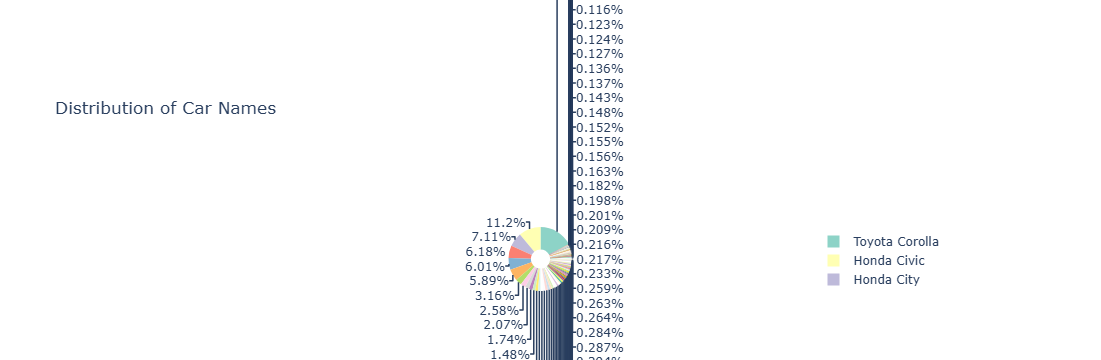

In [309]:
# After visualization it was seen that 98.9 percent of the dataset contains only ten cars and all the remaining cars were dropped because these were contributing to very minimal percentage of the total sample which was less than 1%.
import plotly.express as px

# Count occurrences of each car name
car_counts = df['car_name'].value_counts().reset_index()
car_counts.columns = ['Car Name', 'Count']

# Create Pie Chart
fig = px.pie(car_counts, 
             names='Car Name', 
             values='Count', 
             title="Distribution of Car Names",
             hole=0.3,  # Donut-style chart (optional)
             color_discrete_sequence=px.colors.qualitative.Set3)  # Custom colors

# Show plot
fig.show()

In [312]:
# Creating a new column of the 10 cars which equal to 99 percent of the total sample and removing the others.
retained_cars = ['Toyota Corolla', 'Honda Civic', 'Honda City', 'Suzuki Mehran', 'Suzuki Cultus', 'Suzuki Alto', 'Suzuki Wagon', 'Toyota Vitz', 'Suzuki Swift', 'Toyota Yaris']
df = df[df['car_name'].isin(retained_cars)]
df['car_name'].unique()

array(['Toyota Corolla', 'Honda City', 'Toyota Yaris', 'Suzuki Swift',
       'Honda Civic', 'Suzuki Mehran', 'Suzuki Cultus', 'Toyota Vitz',
       'Suzuki Alto', 'Suzuki Wagon'], dtype=object)

In [314]:
mode_year = 2021.0
print(mode_year)

2021.0


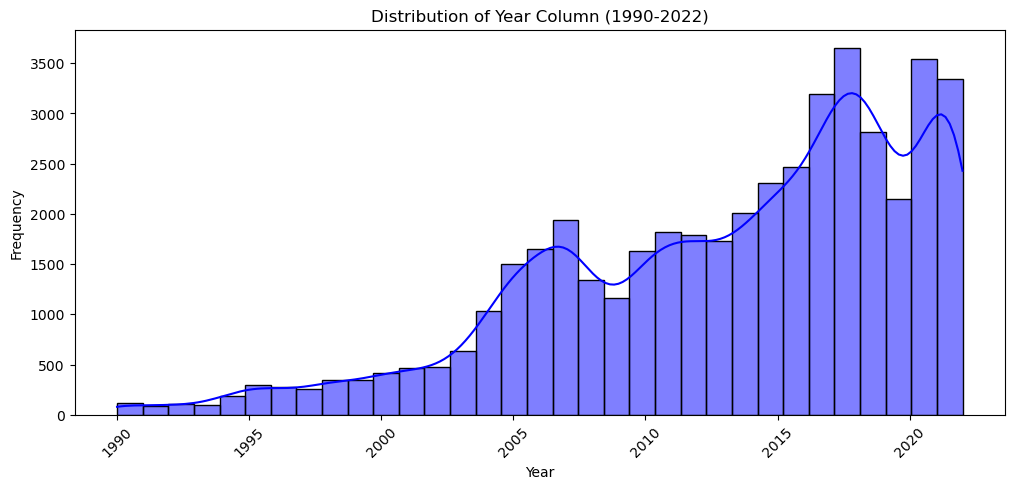

In [316]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))
sns.histplot(df['year'], bins=33, kde=True, color='blue')  # 33 bins for years 1990-2022
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Distribution of Year Column (1990-2022)')
plt.xticks(rotation=45)
plt.show()

In [318]:
# Since the below histogram shows that in the year column majority of the data has increased frequency starting from 2000, peaking around 2021. Furthermore, minimal data belongs to the 1990 - 1999 range of years (left part of the histogram). Finally, 2021 has the highest frequency with a sharp peak making it the most dominant year. Therefore, all the missing values in the year_column will be imputed by 2021.
df.loc[:, 'year'] = df['year'].fillna(mode_year)

In [320]:
df['year'].isna().sum()

0

In [322]:
# Since the columns fuel and price columns has less than 2% missing values so we will drop those missing values
df = df.dropna(subset=['fuel', 'price'])

In [324]:
# Now the dataset contains 0 missing values after the imputation
df.isna().sum()

body            0
year            0
transmission    0
fuel            0
mileage         0
price           0
car_name        0
dtype: int64

In [326]:
df.head()

,body,year,transmission,fuel,mileage,price,car_name
0,Sedan,2013.0,Manual,Petrol,145000,2870000.0,Toyota Corolla
1,Sedan,2000.0,Manual,Petrol,230000,995000.0,Honda City
2,Sedan,2021.0,Manual,Petrol,60500,3585000.0,Toyota Yaris
3,Hatchback,2017.0,Manual,Petrol,87000,2250000.0,Suzuki Swift
4,Sedan,2017.0,Automatic,Petrol,86000,4850000.0,Honda Civic


In [328]:
df.describe()
# minimum price of car is 110,000
# maximum price of car is 529,000,000
# 25% of the car prices are upto 14.9 lacs
# 50% of the car prices are upto 27.5 lacs
# 75% of the car prices are upto 45.5 lacs
# The max price seems to be an outlier because there are 75% cars with price upto 45.5 lacs and there is only one car "Toyota Corolla" which has a price of 52.9 crores so we will drop that row.

,year,mileage,price
count,46364.000000,46364.000000,4.636400e+04
mean,2013.579954,92173.827344,2.925958e+06
std,6.925072,85873.809265,3.054279e+06
min,1990.000000,1.000000,1.600000e+05
25%,2009.000000,40000.000000,1.450000e+06
50%,2015.000000,80000.000000,2.550000e+06
75%,2019.000000,123000.000000,4.000000e+06
max,2022.000000,1000000.000000,5.290000e+08


In [330]:
# This is an outlier because the price of Toyota Corolla Sedan 21 model can not be 52.9 crores
df[df['price'] > 5e8]

,body,year,transmission,fuel,mileage,price,car_name
646,Sedan,2021.0,Manual,Petrol,26401,529000000.0,Toyota Corolla


In [332]:
df.drop(df[df['price'] > 5e8].index, inplace=True)

In [334]:
df

,body,year,transmission,fuel,mileage,price,car_name
0,Sedan,2013.0,Manual,Petrol,145000,2870000.0,Toyota Corolla
1,Sedan,2000.0,Manual,Petrol,230000,995000.0,Honda City
2,Sedan,2021.0,Manual,Petrol,60500,3585000.0,Toyota Yaris
3,Hatchback,2017.0,Manual,Petrol,87000,2250000.0,Suzuki Swift
4,Sedan,2017.0,Automatic,Petrol,86000,4850000.0,Honda Civic
...,...,...,...,...,...,...,...
77869,Sedan,2019.0,Automatic,Petrol,80000,6200000.0,Honda Civic
77872,Hatchback,2019.0,Manual,Petrol,42000,2600000.0,Suzuki Wagon
77873,Sedan,2019.0,Automatic,Petrol,58000,5590000.0,Honda Civic
77874,Hatchback,2015.0,Automatic,Petrol,65000,2420000.0,Suzuki Alto


In [336]:
df.to_csv('Cleaned_Cars.csv')

## Model

In [338]:
# Except the price_column all other columns are considered as features
X = df.drop(columns='price')
y = df['price']

In [340]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [342]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

In [344]:
df = pd.get_dummies(df, columns=['body', 'transmission', 'fuel', 'car_name'], drop_first=True)

In [346]:
df['mileage'] = np.log1p(df['mileage'])

In [348]:
df

,year,mileage,price,body_Crossover,body_Hatchback,body_Mini Van,body_SUV,body_Sedan,body_Station Wagon,transmission_Manual,...,fuel_Petrol,car_name_Honda Civic,car_name_Suzuki Alto,car_name_Suzuki Cultus,car_name_Suzuki Mehran,car_name_Suzuki Swift,car_name_Suzuki Wagon,car_name_Toyota Corolla,car_name_Toyota Vitz,car_name_Toyota Yaris
0,2013.0,11.884496,2870000.0,False,False,False,False,True,False,True,...,True,False,False,False,False,False,False,True,False,False
1,2000.0,12.345839,995000.0,False,False,False,False,True,False,True,...,True,False,False,False,False,False,False,False,False,False
2,2021.0,11.010415,3585000.0,False,False,False,False,True,False,True,...,True,False,False,False,False,False,False,False,False,True
3,2017.0,11.373675,2250000.0,False,True,False,False,False,False,True,...,True,False,False,False,False,True,False,False,False,False
4,2017.0,11.362114,4850000.0,False,False,False,False,True,False,False,...,True,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77869,2019.0,11.289794,6200000.0,False,False,False,False,True,False,False,...,True,True,False,False,False,False,False,False,False,False
77872,2019.0,10.645449,2600000.0,False,True,False,False,False,False,True,...,True,False,False,False,False,False,True,False,False,False
77873,2019.0,10.968216,5590000.0,False,False,False,False,True,False,False,...,True,True,False,False,False,False,False,False,False,False
77874,2015.0,11.082158,2420000.0,False,True,False,False,False,False,False,...,True,False,True,False,False,False,False,False,False,False


In [350]:
# Since we have 4 Nominal Categorical columns in the dataset so we will use One-hot encoding technique to preprocess the data.
ohe = OneHotEncoder()
ohe.fit(X[['car_name', 'fuel', 'body', 'transmission']])

OneHotEncoder()

In [352]:
column_trans = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(categories=ohe.categories_), ['car_name', 'fuel', 'body', 'transmission'])
    ],
    remainder='passthrough',
    force_int_remainder_cols=False)

In [354]:
lr = LinearRegression()

In [356]:
pipeline = make_pipeline(column_trans, lr)

In [358]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(categories=[array(['Honda City', 'Honda Civic', 'Suzuki Alto', 'Suzuki Cultus',
       'Suzuki Mehran', 'Suzuki Swift', 'Suzuki Wagon', 'Toyota Corolla',
       'Toyota Vitz', 'Toyota Yaris'], dtype=object),
                                                                            array(['Diesel', 'Hybrid', 'Petrol'], dtype=object),
                                                                            array(['Compact sedan', 'Crossover', 'Hatchback', 'Mini Van', 'SUV',
       'Sedan', 'Station Wagon'], dtype=object),
                                                                            array(['Automatic', 'Manual'], dtype=object)]),
                                                  ['car_name', 'fuel', 'body',
                                                   'transmission'])])),
                ('linearregression', LinearRegression())])

In [360]:
y_pred = pipeline.predict(X_test)

In [362]:
r2_score(y_test, y_pred)

0.7037486621251154

In [364]:
scores = []
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    lr=LinearRegression()
    pipeline=make_pipeline(column_trans,lr)
    pipeline.fit(X_train, y_train)
    y_pred=pipeline.predict(X_test)
    scores.append(r2_score(y_test, y_pred))

In [365]:
np.argmax(scores)

117

In [368]:
scores[np.argmax(scores)]

0.7787298801661695

In [370]:
import pickle

In [372]:
pickle.dump(pipeline, open('LinearRegressionModel.pkl', 'wb'))

In [388]:
pipeline.predict(pd.DataFrame([['Honda City', 'Sedan', 'Petrol', 2000, 'Manual', 25.956743]], columns=['car_name', 'body', 'fuel', 'year', 'transmission', 'mileage']))

array([1147601.9095])